In [ ]:
# 인공지능으로 가위바위보 판독해보기 두번째
#  손상된 파일을 모두 삭제하고 새로 업로드 하여 진행

In [1]:
from PIL import Image
import os, glob

In [ ]:
# 정확도를 높이기 위해 새로 업로드안 파일을 112*112로 변경함
# 데이터 리싸이징

In [2]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 112x112 사이즈로 바꾸어 저장합니다.
	target_size=(112,112)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [3]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [ ]:
# 데이터 라벨링 

In [4]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=112
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 112, 112, 3)
y_train shape: (300,)


라벨:  0


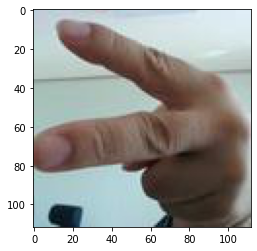

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [ ]:
# 이미지가 선명해짐

In [ ]:
# 딥러닝 네트워크 설계

In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(112,112,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 110, 110, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 53, 53, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                692256    
_________________________________________________________________
dense_5 (Dense)              (

In [ ]:
# 모델 학습

In [7]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 28s 27ms/step - loss: 1.1802 - accuracy: 0.3500
Epoch 2/10
10/10 [==============================] - 0s 7ms/step - loss: 0.9077 - accuracy: 0.6500
Epoch 3/10
10/10 [==============================] - 0s 7ms/step - loss: 0.7292 - accuracy: 0.6967
Epoch 4/10
10/10 [==============================] - 0s 7ms/step - loss: 0.5828 - accuracy: 0.7667
Epoch 5/10
10/10 [==============================] - 0s 7ms/step - loss: 0.4691 - accuracy: 0.8000
Epoch 6/10
10/10 [==============================] - 0s 7ms/step - loss: 0.3128 - accuracy: 0.8533
Epoch 7/10
10/10 [==============================] - 0s 7ms/step - loss: 0.1951 - accuracy: 0.9633
Epoch 8/10
10/10 [==============================] - 0s 7ms/step - loss: 0.1113 - accuracy: 0.9867
Epoch 9/10
10/10 [==============================] - 0s 7ms/step - loss: 0.0666 - accuracy: 0.9867
Epoch 10/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0514 - accuracy: 0.9900


In [ ]:
# 모델 성능평가를 위한 test파일을 112로 resize

In [8]:
test_scissor_image_dir_path = os.getenv("HOME") + "/aiffel/test/scissor"
test_rock_image_dir_path = os.getenv("HOME") + "/aiffel/test/rock"
test_paper_image_dir_path = os.getenv("HOME") + "/aiffel/test/paper"

resize_images(test_scissor_image_dir_path)   # 테스트 가위 이미지 resize
resize_images(test_rock_image_dir_path)   # 테스트 바위 이미지 resize
resize_images(test_paper_image_dir_path)   # 테스트 보 이미지 resize

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [ ]:
# load_data() 함수를 통해 test 이미지를 불러오기

In [9]:
image_dir_path = os.getenv("HOME") + "/aiffel/test"
(x_test, y_test)=load_data(image_dir_path)
x_train_norm = x_train/255.0

print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 112, 112, 3)
y_test shape: (300,)


In [10]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)

print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

10/10 - 0s - loss: 201.8921 - accuracy: 0.6000
test_loss : 201.8921356201172
test_accuracy : 0.6000000238418579


In [ ]:
# 소고
# 성능 평가 결과 정확도가 약 60%
# 정확도가 상승했으나 아직 미흡함
# 정확도가 낮은 이유에 대한 판단 -- 사진 데이터 수가 작기 때문으로 판단.